In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_diabetes
# load the dataset
data = load_diabetes(as_frame=True)
df=data.frame
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [19]:
# print the firsts lines
print(df.head())

# print caracteristics (x) and the target (y)
x=df.drop(columns=['target'])
y=(df['target']>150).astype(int)  # this is a binary transformation

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [20]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Size of the train set: {x_train.shape}")
print(f"Size of the train set: {x_test.shape}")

Size of the train set: (353, 10)
Size of the train set: (89, 10)


In [21]:
# Instanciation and training
model = RandomForestClassifier(random_state=24)
model.fit(x_train, y_train)

# prediction
y_pred = model.predict(x_test)

print(y_pred)

[0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]


In [22]:
# computatuion of metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")

Accuracy : 0.73
precision : 0.74
recall : 0.62
F1-Score : 0.68


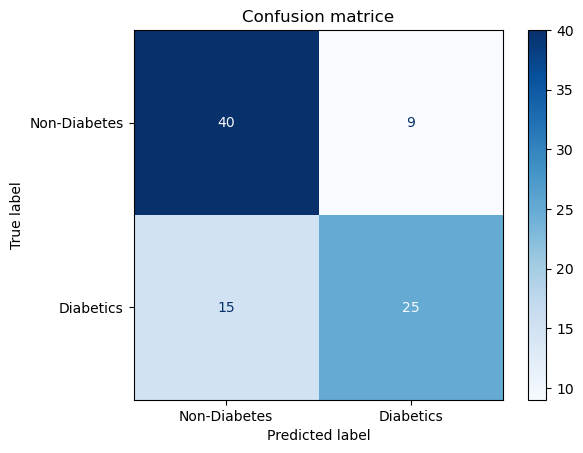

In [23]:
# confusion matrice
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetes', 'Diabetics'])
disp.plot(cmap='Blues')
plt.title('Confusion matrice')
plt.show()

In [44]:
recap = x_test.copy()  # Copie du DataFrame x_test

# Ajout de la colonne "real"
recap["real"] = y_test

# Ajout de la colonne "Prediction"
recap['Prediction'] = y_pred

recap


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,real,Prediction
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220,1,0
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788,0,1
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646,1,0
321,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054,1,1
73,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,-0.009362,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.001751,-0.044642,-0.065486,-0.005670,-0.007073,-0.019476,0.041277,-0.039493,-0.003301,0.007207,1,0
90,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072133,0.011349,0,0
57,-0.027310,-0.044642,-0.063330,-0.050427,-0.089630,-0.104340,0.052322,-0.076395,-0.056153,-0.067351,0,0
391,-0.023677,-0.044642,-0.069797,-0.064199,-0.059359,-0.050478,0.019187,-0.039493,-0.089133,-0.050783,0,0


In [36]:
recap.to_csv('./recap.csv', index=False)
